<a href="https://colab.research.google.com/github/Pranta-Barman/Task-2-....-PDS-12-34/blob/main/Water_bottle_detection_using_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Checking Gpu status

In [ ]:
!nvidia-smi

Thu Jan 30 09:25:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#Get current working directory

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics
Install required dependencies, import YOLO library and check system requirements

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.1/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

Creating a directory to store datasets, install Roboflow (for dataset management), importing roboflow and initializing with API key and loading water bottle dataset from roboflow.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="b7AsdZU8FLLejYOfb5Qo")
project = rf.workspace("pbarm").project("waterbottle-n9a3i-loqhv")
version = project.version(1)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to waterbottle-1 in yolov11:: 100%|██████████| 1010/1010 [00:00<00:00, 2549.79it/s]


## Custom Training

Train YOLO model on the downloaded dataset

List training output directory contents

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=25 imgsz=600 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 163MB/s]
New https://pypi.org/project/ultralytics/8.3.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/waterbottle-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1738228254.0e23e289470b.1398.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch330.jpg	weights
P_curve.png					    train_batch331.jpg
PR_curve.png					    train_batch332.jpg


#Display training results

# Confusion matrix

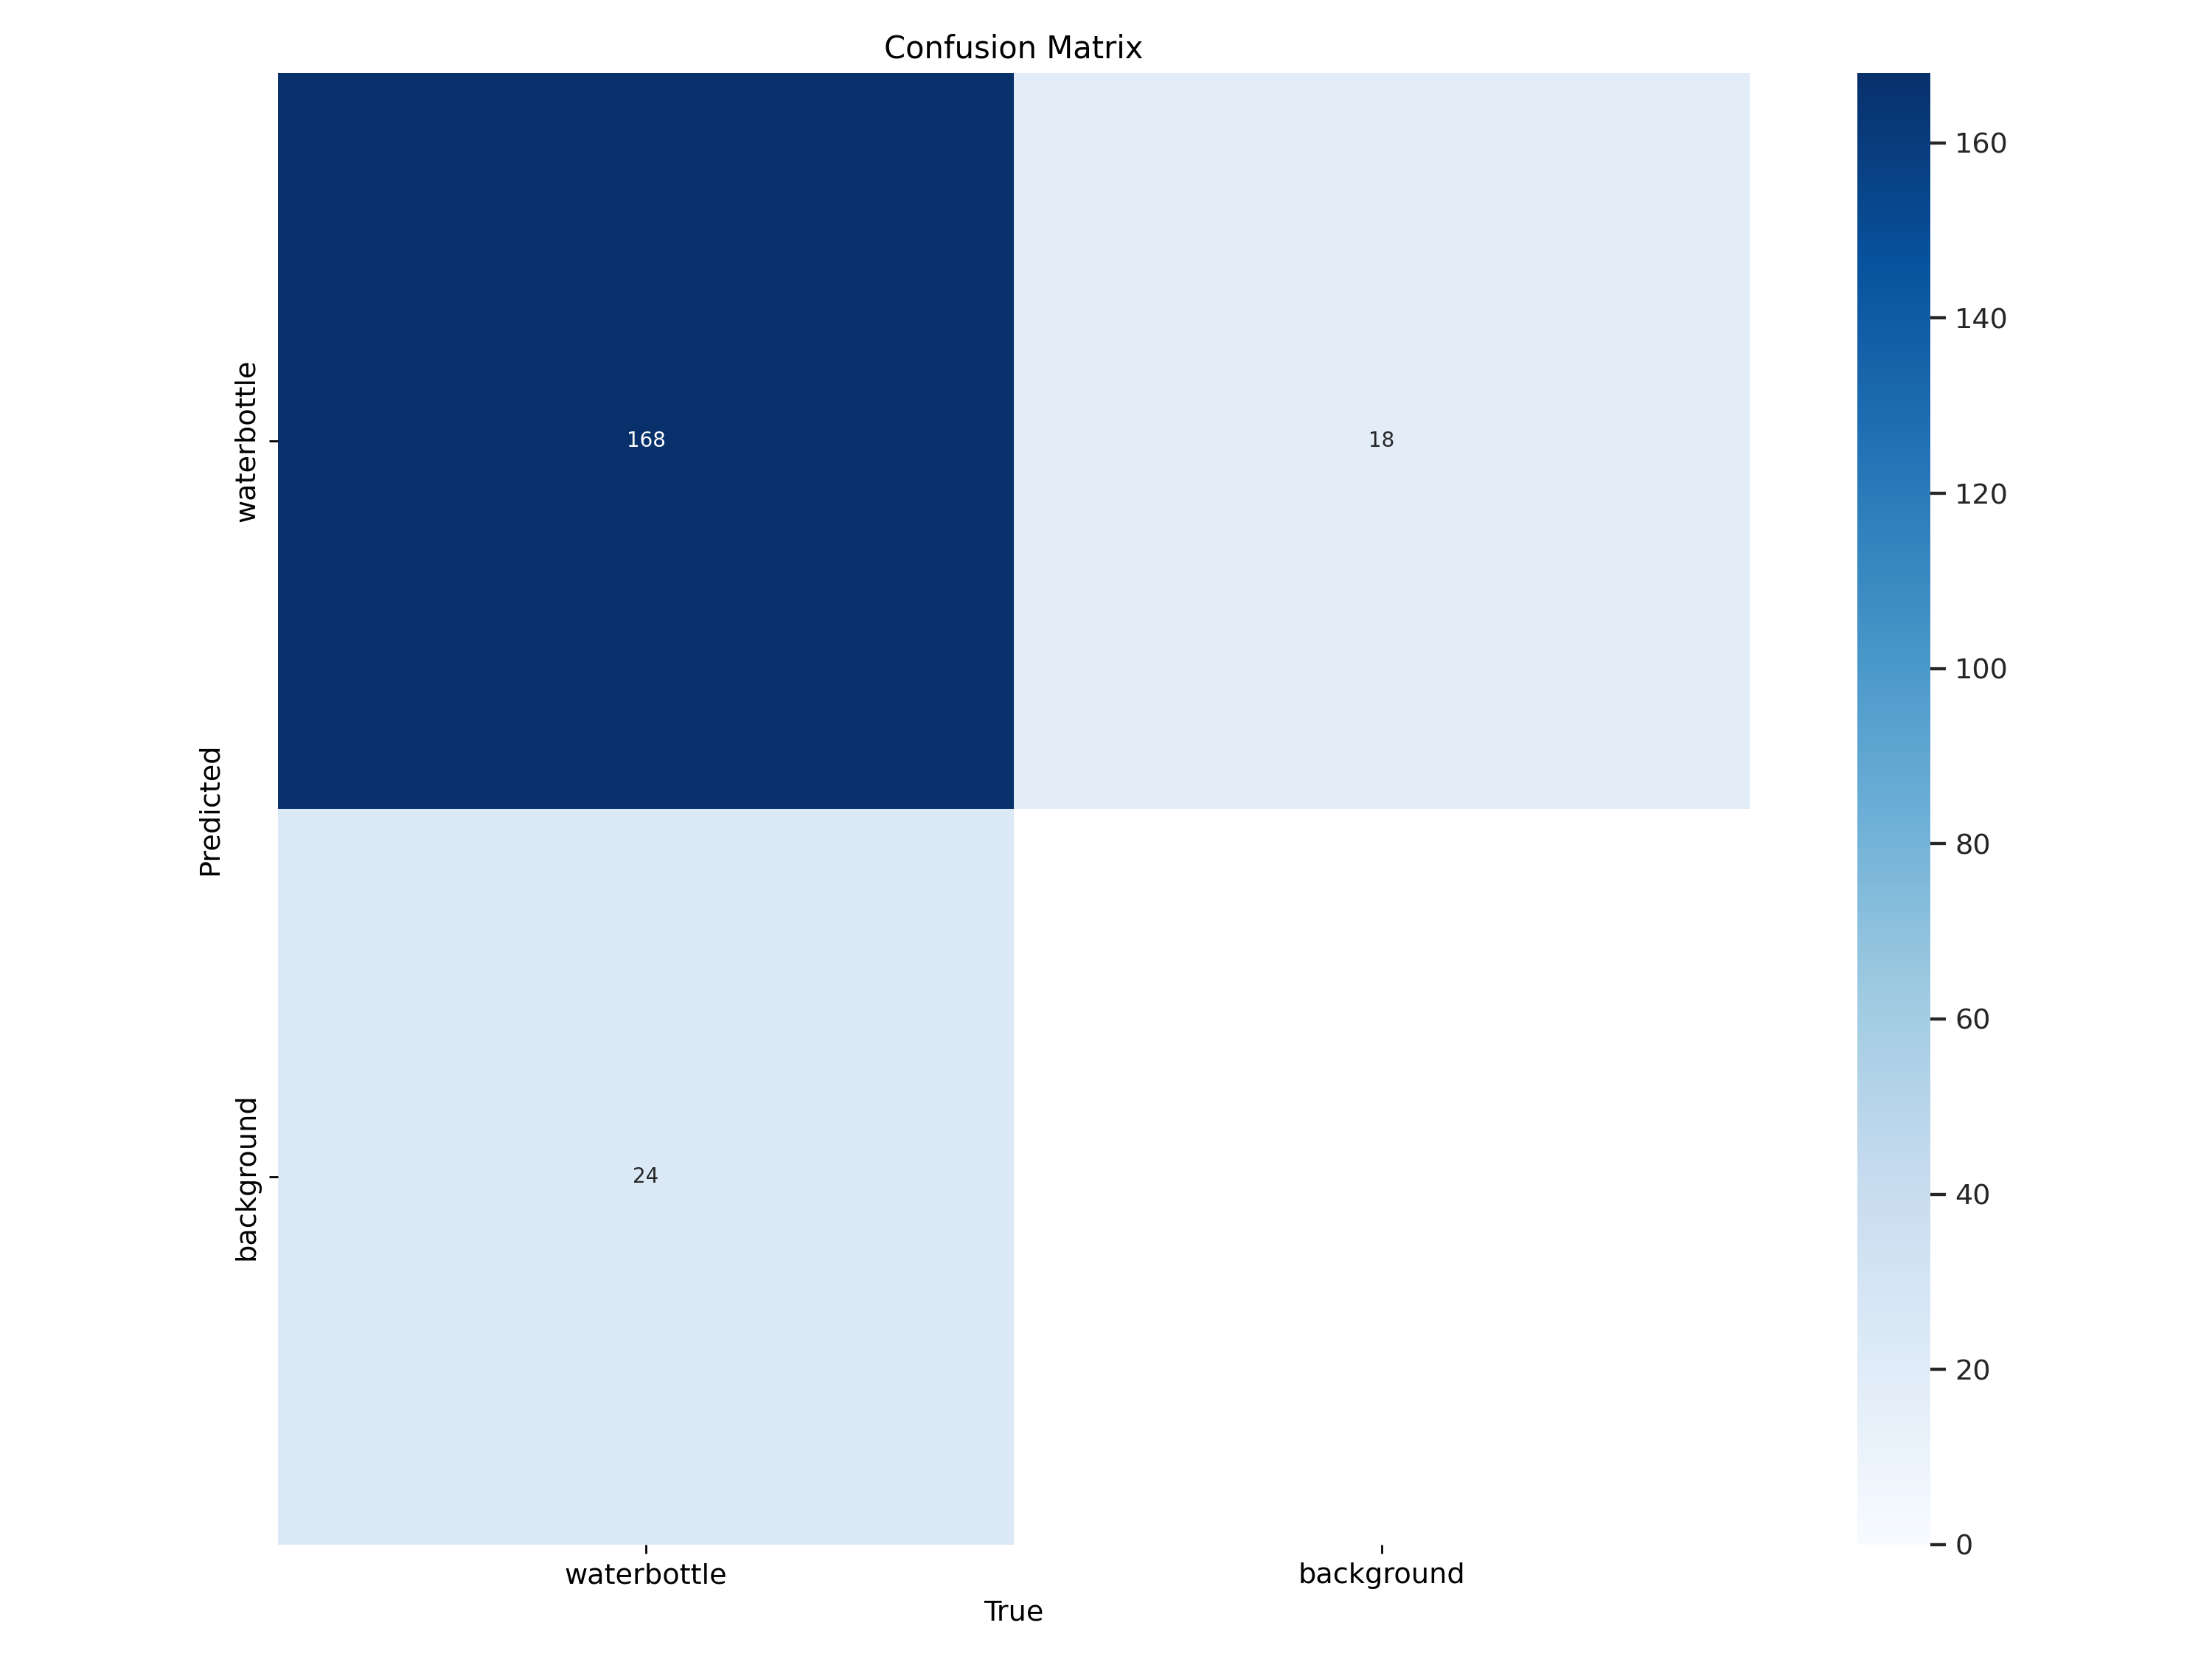

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=780)

# Training result

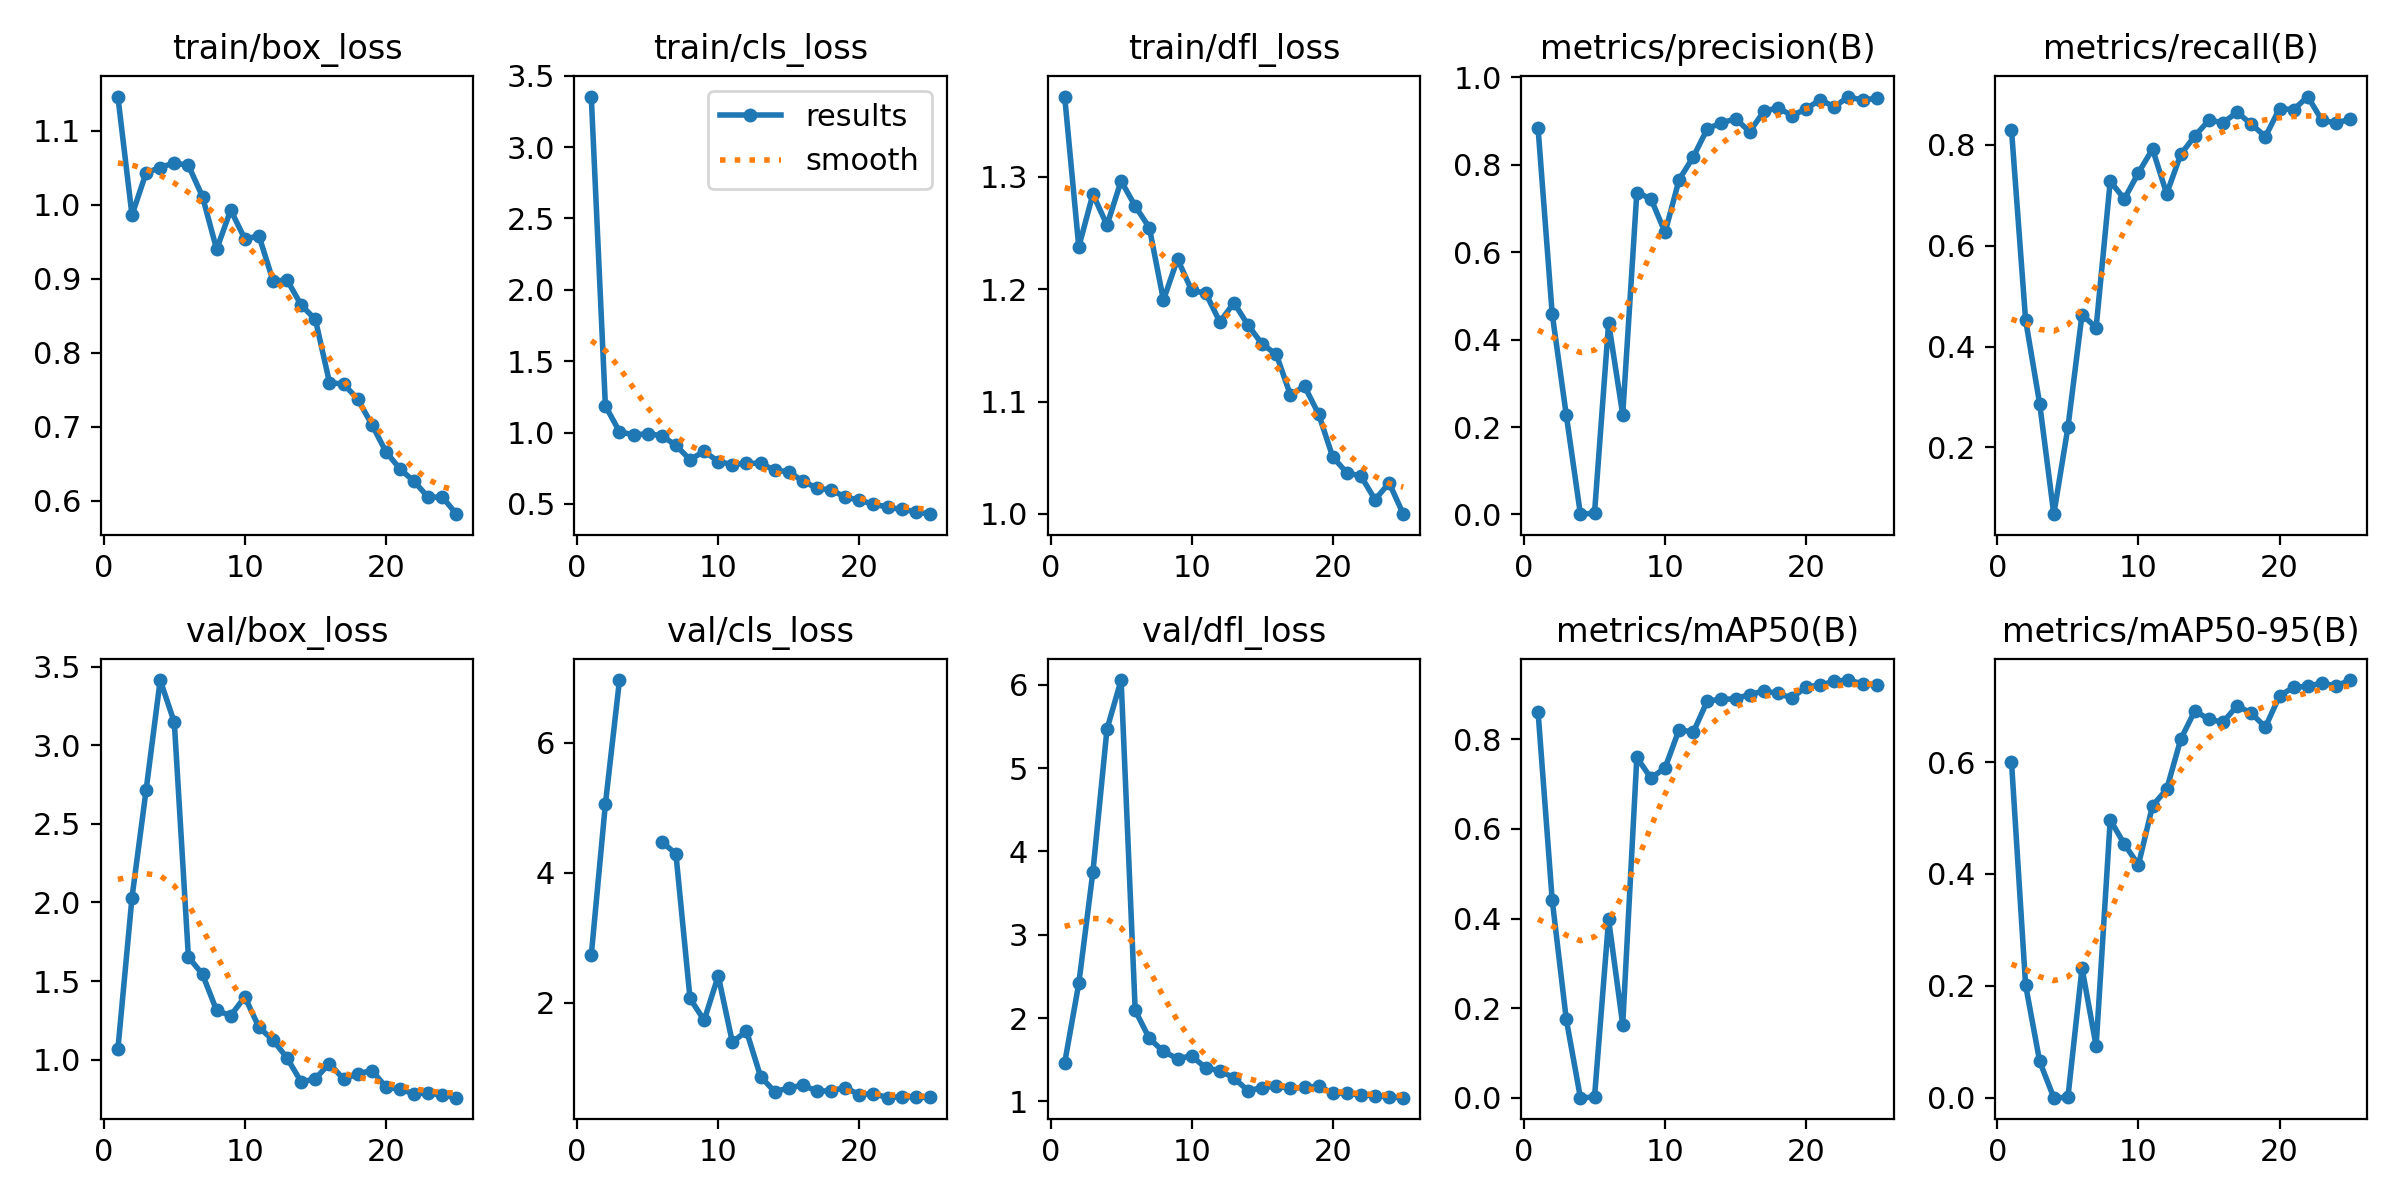

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=800)

# test

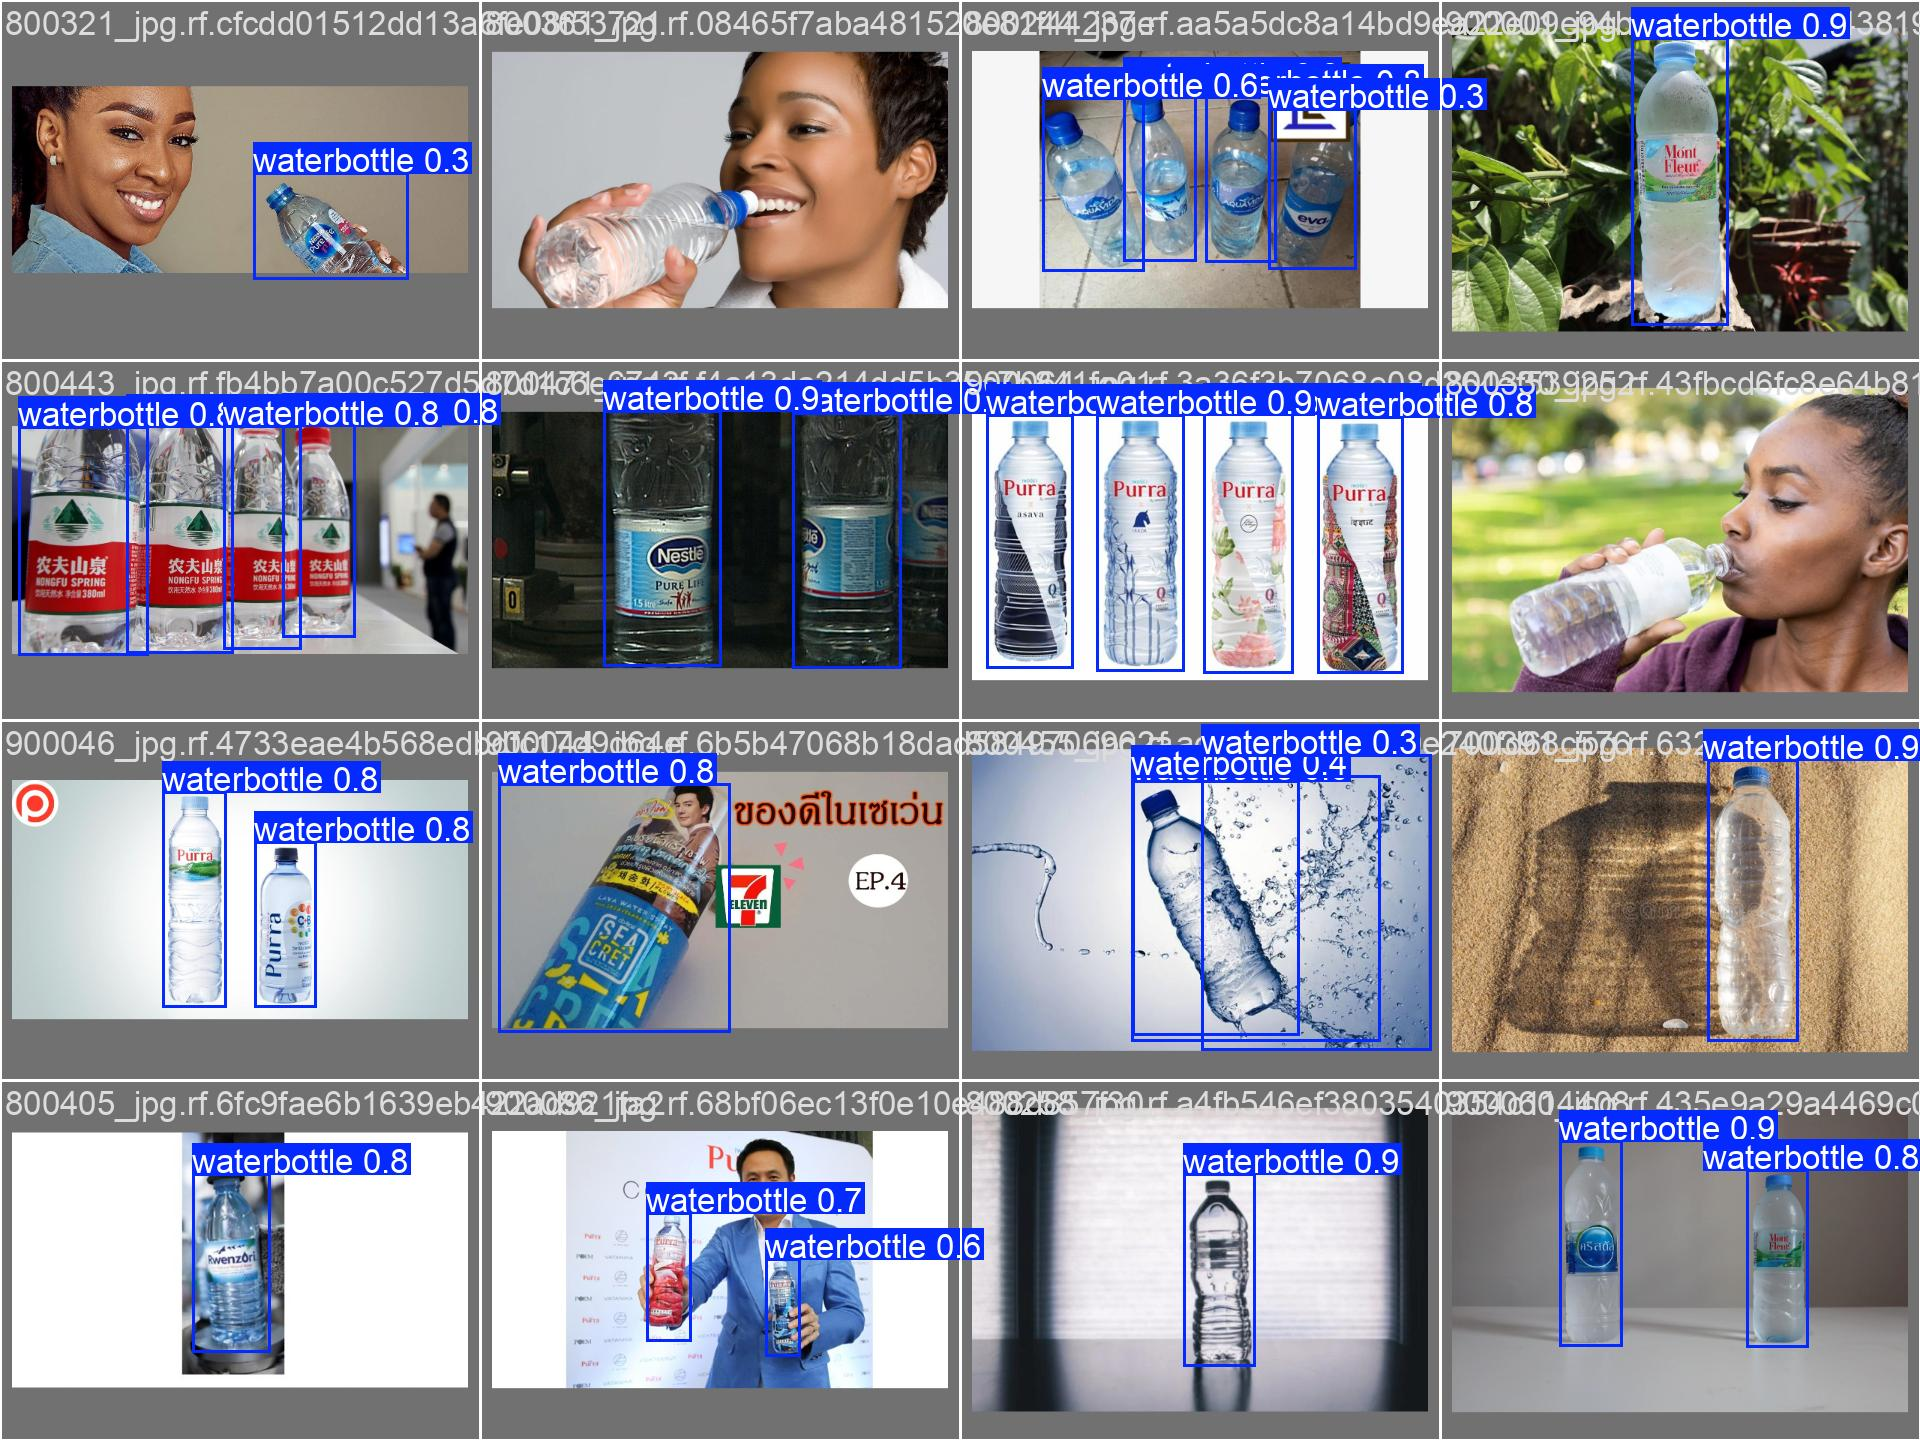

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=900)

## Validate fine-tuned model

Validate the trained model on test dataset

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/waterbottle-1/valid/labels.cache... 100 images, 4 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.62it/s]
                   all        100        192       0.95      0.854      0.922      0.749
Speed: 3.1ms preprocess, 17.9ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

Run inference on test images

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/50 /content/datasets/waterbottle-1/test/images/500613_jpg.rf.b3bbd8a865982a541cd4e4650e5dd017.jpg: 608x480 1 waterbottle, 48.3ms
image 2/50 /content/datasets/waterbottle-1/test/images/500625_jpg.rf.30147442e3adc0886595e30312b436cf.jpg: 608x480 1 waterbottle, 12.2ms
image 3/50 /content/datasets/waterbottle-1/test/images/500632_jpg.rf.9c98dc4df2f0c73d507f02cb1792dd0a.jpg: 608x608 4 waterbottles, 15.9ms
image 4/50 /content/datasets/waterbottle-1/test/images/500693_jpg.rf.3570f30aff8ac86c2ef8f3674537150d.jpg: 608x608 3 waterbottles, 15.1ms
image 5/50 /content/datasets/waterbottle-1/test/images/500749_jpg.rf.b916b928eee627454bea8e7b215d46c7.jpg: 608x480 1 waterbottle, 12.8ms
image 6/50 /content/datasets/waterbottle-1/test/images/500754_jpg.rf.a3e9c32460abaed670cb8d237e44ee8a.jpg: 384x608 1 waterbottle, 46.8ms
image 7/5

# Latest prediction result

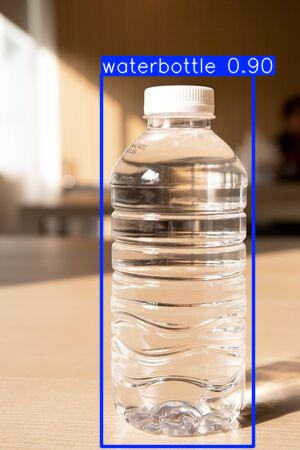

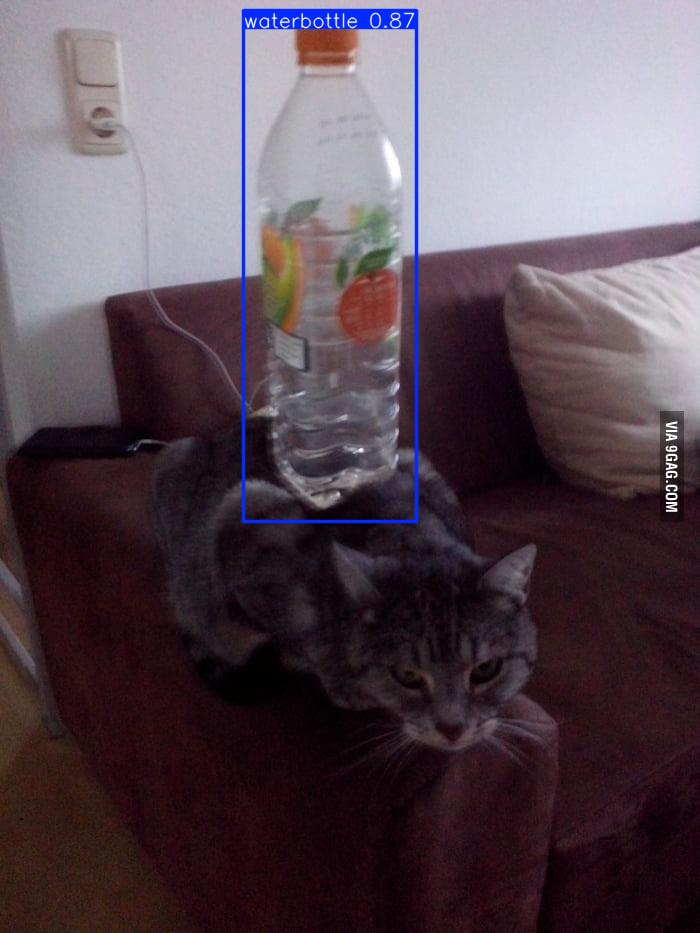

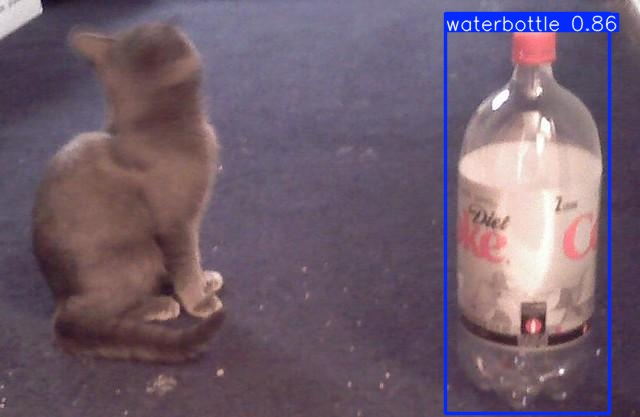

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Export model in tfjs format

In [ ]:
!yolo export task=detect model={HOME}/runs/detect/train/weights/best.pt format=tfjs save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 608, 608) BCHW and output shape(s) (1, 5, 7581) (18.3 MB)
E0000 00:00:1738228577.286192    2945 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738228577.291294    2945 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This b

## Zip the TFJS model
 Can be downloaded in Zip form

In [ ]:
import shutil

folder_path = "/content/runs/detect/train/weights/best_web_model"
zip_path = "./tfjs_model.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

'/content/tfjs_model.zip'